# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import owkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating Dataframe
cities_data=pd.DataFrame(cities,columns=["City"])
labels=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
for each_label in labels:
    cities_data[each_label]=""

# Fetching City Data
record=0
units="Imperial"
for index, row in cities_data.iterrows():
    city=row["City"]
    try:
        url_string=f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={owkey}&units={units}"
        response=requests.get(url_string)
        city_info=response.json()
        #feeding data into dataframe
        cities_data.loc[index,"Lat"]=city_info["coord"]["lat"]
        cities_data.loc[index,"Lng"]=city_info["coord"]["lon"]
        cities_data.loc[index,"Max Temp"]=city_info["main"]["temp_max"]
        cities_data.loc[index,"Humidity"]=city_info["main"]["humidity"]
        cities_data.loc[index,"Cloudiness"]=city_info["clouds"]["all"]
        cities_data.loc[index,"Wind Speed"]=city_info["wind"]["speed"]
        cities_data.loc[index,"Country"]=city_info["sys"]["country"]
        cities_data.loc[index,"Date"]=city_info["dt"]
        print(f"Processing Record {record}| {city}")
        record=record+1
    except KeyError:
        pass
        print(f"{city} did not exist. Skipping...")
print("-"*30)
print("End of Records")


Processing Record 0| palamos
Processing Record 1| karratha
Processing Record 2| jamestown
Processing Record 3| bandarbeyla
Processing Record 4| jacobina
Processing Record 5| punta arenas
Processing Record 6| livingston
Processing Record 7| fairbanks
Processing Record 8| albany
Processing Record 9| olinda
Processing Record 10| sorland
Processing Record 11| the valley
Processing Record 12| rikitea
belushya guba did not exist. Skipping...
Processing Record 13| chokurdakh
Processing Record 14| yulara
barentsburg did not exist. Skipping...
Processing Record 15| laguna
Processing Record 16| marieville
Processing Record 17| busselton
Processing Record 18| coos bay
Processing Record 19| cape town
meyungs did not exist. Skipping...
Processing Record 20| cabo san lucas
Processing Record 21| douglas
Processing Record 22| gorin
Processing Record 23| geraldton
Processing Record 24| codrington
Processing Record 25| barrow
Processing Record 26| vaini
Processing Record 27| kumba
Processing Record 28| 

Processing Record 237| leningradskiy
Processing Record 238| warrnambool
Processing Record 239| kruisfontein
Processing Record 240| sungaipenuh
Processing Record 241| narrabri
Processing Record 242| mwinilunga
Processing Record 243| mlonggo
Processing Record 244| tautira
Processing Record 245| rawson
tumannyy did not exist. Skipping...
Processing Record 246| teya
Processing Record 247| pavlohrad
Processing Record 248| rockford
Processing Record 249| yenagoa
Processing Record 250| iqaluit
Processing Record 251| necochea
Processing Record 252| ola
Processing Record 253| batemans bay
Processing Record 254| caravelas
Processing Record 255| port moresby
Processing Record 256| sanmenxia
Processing Record 257| bathsheba
Processing Record 258| port lincoln
Processing Record 259| hovd
Processing Record 260| vila velha
grand river south east did not exist. Skipping...
Processing Record 261| rocha
Processing Record 262| sarankhola
Processing Record 263| monster
Processing Record 264| concordia
Pro

tome-acu did not exist. Skipping...
Processing Record 467| boa esperanca
Processing Record 468| grindavik
Processing Record 469| paamiut
Processing Record 470| morbegno
Processing Record 471| accra
Processing Record 472| bara
Processing Record 473| thinadhoo
Processing Record 474| manaure
Processing Record 475| kousseri
Processing Record 476| ushtobe
Processing Record 477| arapiraca
Processing Record 478| pervomayskoye
alotau did not exist. Skipping...
Processing Record 479| dalaba
utiroa did not exist. Skipping...
Processing Record 480| ajdabiya
Processing Record 481| george
Processing Record 482| hemnesberget
Processing Record 483| kharp
Processing Record 484| narsaq
Processing Record 485| puerto gaitan
Processing Record 486| port macquarie
Processing Record 487| churachandpur
Processing Record 488| inhambane
Processing Record 489| burnie
Processing Record 490| boa vista
Processing Record 491| bose
Processing Record 492| maumere
Processing Record 493| leh
Processing Record 494| kauna

In [4]:
#Convert columns to floats
cities_data[["Lat","Lng","Humidity","Cloudiness","Wind Speed",
             "Max Temp"]]=cities_data[["Lat","Lng","Humidity","Cloudiness","Wind Speed","Max Temp"]].apply(pd.to_numeric,axis=1)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_data["Country"].replace("",np.nan,inplace=True)
cities_data.dropna(subset=["Country"], inplace=True)
cities_data.reset_index(drop=True, inplace=True)
cities_data.to_csv(output_data_file)
cities_data.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palamos,41.85,3.13,93.00,54.0,0.0,6.80,ES,1596035372
1,karratha,-20.74,116.85,68.67,63.0,0.0,4.03,AU,1596035141
2,jamestown,42.10,-79.24,77.00,73.0,90.0,8.05,US,1596035373
3,bandarbeyla,9.49,50.81,81.01,70.0,88.0,28.90,SO,1596035373
4,jacobina,-11.18,-40.52,77.54,54.0,54.0,10.60,BR,1596035374
...,...,...,...,...,...,...,...,...,...
549,bud,39.45,-86.18,80.01,65.0,1.0,2.33,US,1596035572
550,crib point,-38.35,145.20,51.01,91.0,1.0,11.32,AU,1596035572
551,vuktyl,63.86,57.31,64.53,62.0,28.0,8.46,RU,1596035573
552,mennecy,48.57,2.44,81.00,31.0,10.0,3.36,FR,1596035573


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#No cities with a humidity over 100%
cities_data.sort_values(by="Humidity",ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
198,muisne,0.60,-80.03,75.20,100.0,75.0,4.70,EC,1596035442
538,pangnirtung,66.15,-65.71,48.20,100.0,75.0,8.05,CA,1596035465
66,esperance,-33.87,121.90,53.60,100.0,0.0,9.17,AU,1596035397
228,nuuk,64.18,-51.72,46.40,100.0,90.0,2.24,GL,1596035452
420,zunheboto,25.97,94.52,64.80,100.0,100.0,0.83,IN,1596035522
...,...,...,...,...,...,...,...,...,...
155,hami,42.80,93.45,87.12,13.0,100.0,6.62,CN,1596035427
149,ravar,31.27,56.81,92.01,12.0,0.0,12.59,IR,1596035425
170,bilma,18.69,12.92,107.20,11.0,0.0,3.02,NE,1596035432
395,sakakah,29.97,40.21,116.60,8.0,40.0,4.70,SA,1596035512


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

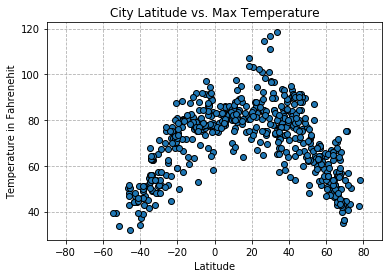

In [8]:
plt.scatter(cities_data["Lat"],cities_data["Max Temp"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature in Fahrenehit")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Latitude vs. Humidity Plot

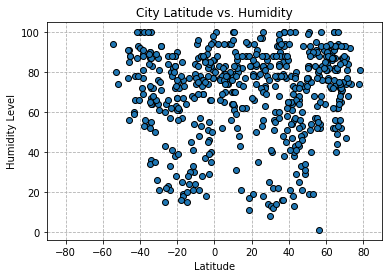

In [9]:
plt.scatter(cities_data["Lat"],cities_data["Humidity"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity Level")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Latitude vs. Cloudiness Plot

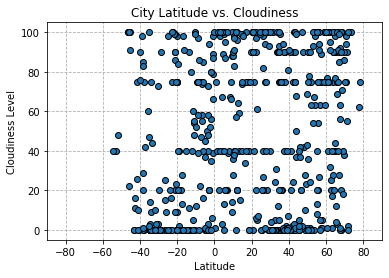

In [10]:
plt.scatter(cities_data["Lat"],cities_data["Cloudiness"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Level")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Latitude vs. Wind Speed Plot

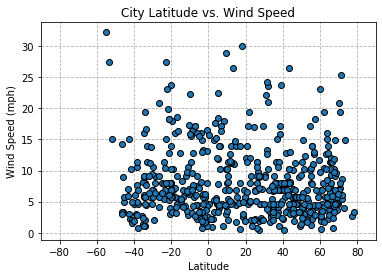

In [11]:
plt.scatter(cities_data["Lat"],cities_data["Wind Speed"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_tool(x_value,y_value,x_label,y_label,title,x_min,x_max):    
    slope,intercept,rvalue,pvalue,stderr=linregress(x_value,y_value)
    yline=slope*x_value+intercept
    plt.scatter(x_value,y_value,edgecolors="black", zorder=3)
    plt.plot(x_value,yline, color="salmon")
    plt.annotate(f"y={round(slope,2)}x+{round(intercept,2)}",(x_min+5,min(y_value)), color="salmon")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(x_min,x_max)
    plt.grid(linestyle="dashed", zorder=0)
    print(f"The R Sqaured value is = {rvalue**2}")
    plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames
#Northern
n_hem=cities_data.loc[cities_data["Lat"] > 0]
#Southern
s_hem=cities_data.loc[cities_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Sqaured value is = 0.48629182317634606


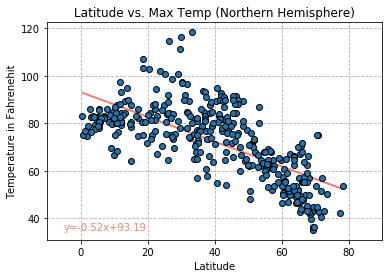

In [14]:
#Linear regression
plot_tool(x_value=n_hem["Lat"],y_value=n_hem["Max Temp"],x_label="Latitude",x_min=-10,x_max=90,
          y_label="Temperature in Fahrenehit",title="Latitude vs. Max Temp (Northern Hemisphere)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Sqaured value is = 0.6979443797012701


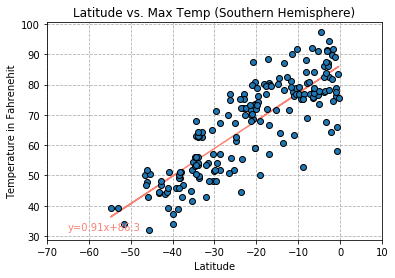

In [15]:
plot_tool(x_value=s_hem["Lat"],y_value=s_hem["Max Temp"],x_label="Latitude",x_min=-70,x_max=10,
          y_label="Temperature in Fahrenehit",title="Latitude vs. Max Temp (Southern Hemisphere)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Sqaured value is = 0.001066705821185721


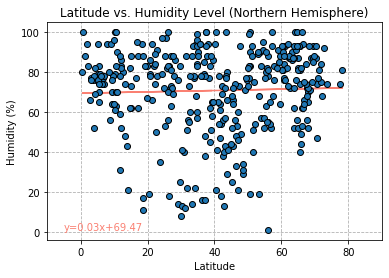

In [16]:
plot_tool(x_value=n_hem["Lat"],y_value=n_hem["Humidity"],x_label="Latitude",x_min=-10,x_max=90,
          y_label="Humidity (%)",title="Latitude vs. Humidity Level (Northern Hemisphere)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Sqaured value is = 0.033264206629029895


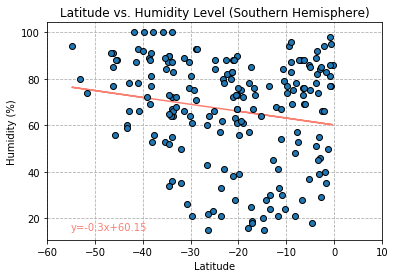

In [17]:
plot_tool(x_value=s_hem["Lat"],y_value=s_hem["Humidity"],x_label="Latitude",x_min=-60,x_max=10,
          y_label="Humidity (%)",title="Latitude vs. Humidity Level (Southern Hemisphere)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Sqaured value is = 0.0004215476318277742


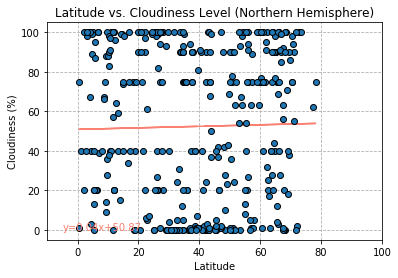

In [18]:
plot_tool(x_value=n_hem["Lat"],y_value=n_hem["Cloudiness"],x_label="Latitude",x_min=-10,x_max=100,
          y_label="Cloudiness (%)",title="Latitude vs. Cloudiness Level (Northern Hemisphere)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Sqaured value is = 0.01802881510252013


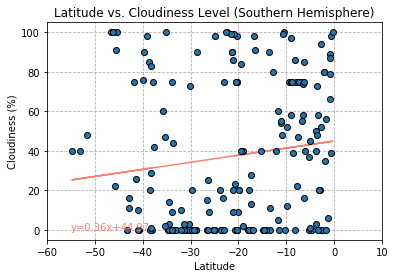

In [19]:
plot_tool(x_value=s_hem["Lat"],y_value=s_hem["Cloudiness"],x_label="Latitude",x_min=-60,x_max=10,
          y_label="Cloudiness (%)",title="Latitude vs. Cloudiness Level (Southern Hemisphere)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Sqaured value is = 0.012108594791005525


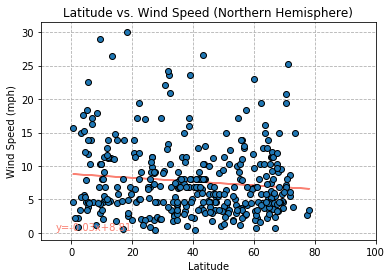

In [20]:
plot_tool(x_value=n_hem["Lat"],y_value=n_hem["Wind Speed"],x_label="Latitude",x_min=-10,x_max=100,
          y_label="Wind Speed (mph)",title="Latitude vs. Wind Speed (Northern Hemisphere)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Sqaured value is = 0.0023467140853867313


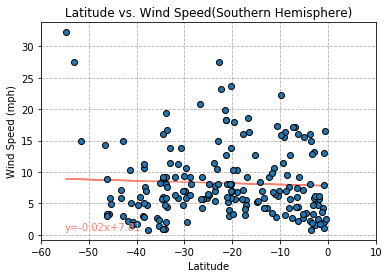

In [21]:
plot_tool(x_value=s_hem["Lat"],y_value=s_hem["Wind Speed"],x_label="Latitude",x_min=-60,x_max=10,
          y_label="Wind Speed (mph)",title="Latitude vs. Wind Speed(Southern Hemisphere)")